# 5. TÉCNICAS DE AGRUPACIÓN Y CLASIFICACIÓN

Este notebook presenta las técnicas de agrupamiento y clasificación, con un enfoque académico formal, incluyendo la teoría matemática y ejemplos prácticos intercalados usando **datasets clásicos ligeros**.

Subtemas:
1. Análisis de agrupamiento (clustering)
2. Análisis discriminante
3. Análisis de correspondencia simple y múltiple

%pip install prince

-----
## 5.1 ANÁLISIS DE AGRUPAMIENTO (CLUSTERING)

### 5.1.1 Introducción

El clustering busca **dividir un conjunto de datos no etiquetado** en grupos (clusters) de elementos similares entre sí y distintos de los demás. Sea un conjunto de observaciones \(X = \{x_1, x_2, ..., x_n\}\) en \(\mathbb{R}^p\). El objetivo es encontrar un conjunto de particiones \(C = \{C_1, ..., C_k\}\) que maximice la similitud intra-cluster y minimice la similitud inter-cluster.

Formalmente, para un criterio de distancia \(d(x_i, x_j)\) y una función de disimilitud intra-cluster \(W(C) = \sum_{l=1}^k \sum_{x_i, x_j \in C_l} d(x_i, x_j)^2\), buscamos:

$$C^* = \arg\min_C W(C)$$

### 5.1.2 Distancias y medidas de similitud

- **Euclidiana**: $d(x_i, x_j) = \sqrt{\sum_{l=1}^p (x_{il} - x_{jl})^2}$
- **Manhattan**: $d(x_i, x_j) = \sum_{l=1}^p |x_{il} - x_{jl}|$
- **Mahalanobis**: $d(x_i, x_j) = \sqrt{(x_i - x_j)^T S^{-1} (x_i - x_j)}$, donde $S$ es la matriz de covarianza
- Otras medidas: coseno, correlación, Chebyshev

In [1]:
# Ejemplo práctico: distancias en dataset Iris
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform

iris = load_iris()
X_iris = iris.data
labels_true = iris.target

# Matriz de distancias Euclideanas
D_euclidean = squareform(pdist(X_iris, metric='euclidean'))
print('Matriz de distancias Euclideanas (primeras 5 observaciones):')
print(D_euclidean[:5, :5])

Matriz de distancias Euclideanas (primeras 5 observaciones):
[[0.         0.53851648 0.50990195 0.64807407 0.14142136]
 [0.53851648 0.         0.3        0.33166248 0.60827625]
 [0.50990195 0.3        0.         0.24494897 0.50990195]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.        ]]


### 5.1.3 Agrupamiento jerárquico

Los métodos jerárquicos construyen un dendrograma para representar la similitud entre observaciones:

- **Enlace simple**: mínima distancia entre puntos de clusters
- **Enlace completo**: máxima distancia entre puntos de clusters
- **Enlace promedio**: distancia promedio entre puntos de clusters
- **Ward**: minimiza la varianza intra-cluster

Formalmente, en enlace Ward, para clusters $C_r$ y $C_s$, la distancia se define como:
$$D(C_r, C_s) = \frac{|C_r||C_s|}{|C_r| + |C_s|} ||\bar{x}_r - \bar{x}_s||^2$$

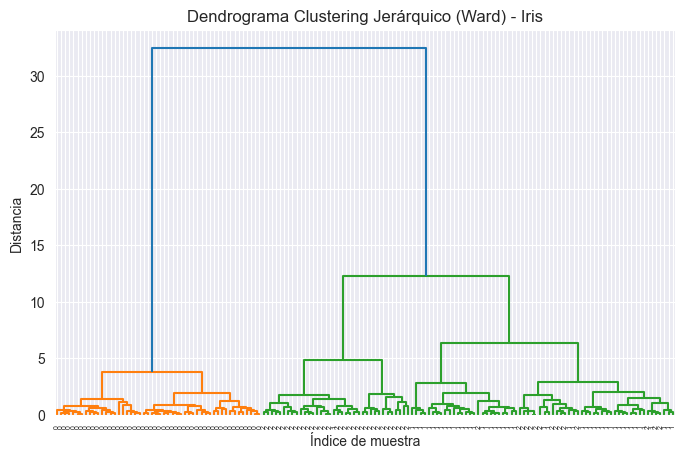

In [2]:
# Clustering jerárquico y dendrograma
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_iris, method='ward')
plt.figure(figsize=(8,5))
dendrogram(Z, labels=iris.target)
plt.title('Dendrograma Clustering Jerárquico (Ward) - Iris')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

### 5.1.4 Agrupamiento no jerárquico (K-means)

K-means busca minimizar la suma de distancias cuadradas a los centroides:

$$\min_{C_1,...,C_k} \sum_{l=1}^k \sum_{x_i \in C_l} ||x_i - \mu_l||^2$$

Algoritmo iterativo:
1. Inicializar k centroides aleatorios
2. Asignar cada punto al centroide más cercano
3. Recalcular centroides
4. Repetir hasta convergencia

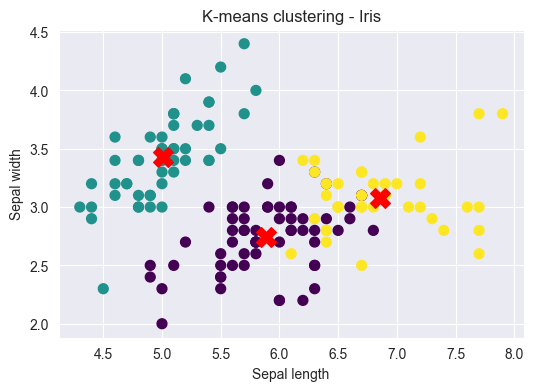

In [3]:
# K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_iris)

plt.figure(figsize=(6,4))
plt.scatter(X_iris[:,0], X_iris[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title('K-means clustering - Iris')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### 5.1.5 Interpretación

- Evaluar consistencia con etiquetas conocidas (si existen) usando **Adjusted Rand Index (ARI)** o **Silhouette Score**
- Comparar diferentes métodos y número de clusters

In [4]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

sil = silhouette_score(X_iris, y_kmeans)
ari = adjusted_rand_score(labels_true, y_kmeans)
print('Silhouette Score:', round(sil,4))
print('Adjusted Rand Index (vs etiquetas reales):', round(ari,4))

Silhouette Score: 0.5512
Adjusted Rand Index (vs etiquetas reales): 0.7163


-----
## 5.2 ANÁLISIS DISCRIMINANTE

### 5.2.1 Introducción

El análisis discriminante busca **clasificar observaciones en grupos conocidos** maximizando la separación entre ellos. Sea un vector aleatorio \(x\in\mathbb{R}^p\) y etiquetas \(y\in\{1,..,K\}\). Se busca una función lineal discriminante:

$$ 
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k
$$

donde:
- $\mu_k$ = media del grupo k
- $\Sigma$ = matriz de covarianza común
- $\pi_k$ = proporción a priori del grupo k

Dimensiones después de LDA: (150, 2)


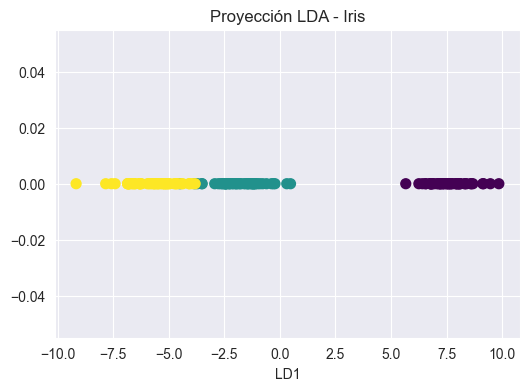

In [5]:
# Linear Discriminant Analysis (LDA) - Iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_iris, labels_true)
print('Dimensiones después de LDA:', X_lda.shape)

plt.figure(figsize=(6,4))
plt.scatter(X_lda[:,0], X_lda[:,0]*0, c=labels_true, cmap='viridis', s=50)
plt.title('Proyección LDA - Iris')
plt.xlabel('LD1')
plt.show()

### 5.2.2 Función discriminante canónica

Se proyecta el espacio de variables en **componentes discriminantes** lineales:

$$y = X w$$
donde $w$ maximiza la relación entre la varianza entre grupos y la varianza dentro de grupos:
$$w^* = \arg\max_w \frac{w^T S_B w}{w^T S_W w}$$
con $S_B$ = matriz de covarianza entre grupos y $S_W$ = matriz de covarianza intra-grupo.

-----
## 5.3 ANÁLISIS DE CORRESPONDENCIA (CA) Y MÚLTIPLE (MCA)

### 5.3.1 Introducción

El CA se aplica a **tablas de contingencia** para explorar relaciones entre categorías. Se basa en descomposición en valores singulares (SVD) de matrices centradas y normalizadas.

El MCA es extensión de CA para más de dos variables categóricas, utilizando **matriz de Burt** o codificación indicador binaria.

CA eigenvalues: [0.11547586]


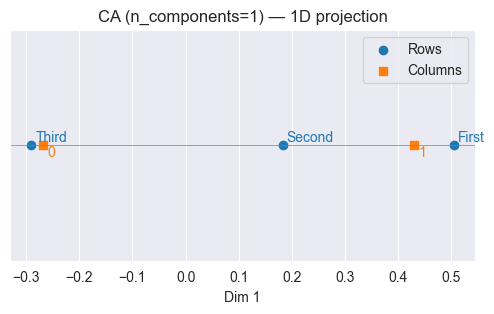

In [14]:
# python
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from prince import CA, MCA

titanic = sns.load_dataset('titanic')[['class', 'sex', 'survived']].dropna()
tab = pd.crosstab(titanic['class'], titanic['survived'])

# Option A: CA with n_components=1 (appropriate for 3x2 table)
ca = CA(n_components=1, random_state=0).fit(tab)
print('CA eigenvalues:', ca.eigenvalues_)
row_coords = ca.row_coordinates(tab)
col_coords = ca.column_coordinates(tab)

x_r = row_coords.iloc[:, 0]
x_c = col_coords.iloc[:, 0]
y_r = np.zeros_like(x_r)
y_c = np.zeros_like(x_c)

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(x_r, y_r, c='C0', label='Rows')
ax.scatter(x_c, y_c, c='C1', marker='s', label='Columns')
for txt, xr in zip(row_coords.index, x_r):
    ax.annotate(txt, (xr, 0), color='C0', xytext=(3,3), textcoords='offset points')
for txt, xc in zip(col_coords.index, x_c):
    ax.annotate(txt, (xc, 0), color='C1', xytext=(3,-8), textcoords='offset points')
ax.set_xlabel('Dim 1')
ax.set_yticks([])
ax.set_title('CA (n_components=1) — 1D projection')
ax.legend()
plt.axhline(0, color='gray', lw=0.5)
plt.show()



In [15]:
from prince import MCA

# MCA - multiple categorical variables
mca = MCA(n_components=2, random_state=0)
mca = mca.fit(titanic)
mca_row_coords = mca.row_coordinates(titanic)
mca_row_coords.head()

,0,1
0,-0.780625,-0.127979
1,1.321001,-0.605145
2,0.739744,-0.080709
3,1.321001,-0.605145
4,-0.780625,-0.127979


-----
## 5.4 Notas finales y referencias académicas

- Clustering: comparar métodos y validar con Silhouette o ARI.
- Análisis discriminante: asegurar supuestos de normalidad y covarianza homogénea.
- Correspondencia: interpretar inercia, distancias entre categorías y dimensiones principales.

### Referencias recomendadas:
- Kaufman, L., & Rousseeuw, P. J. (2009). *Finding Groups in Data: An Introduction to Cluster Analysis*. Wiley.
- Jolliffe, I.T. (2002). *Principal Component Analysis*. Springer.
- Rencher, A.C. (2002). *Methods of Multivariate Analysis*. Wiley.
- Greenacre, M. (2017). *Correspondence Analysis in Practice*. Chapman & Hall.